#### About this file:

###### This file contains dataset with 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region) that were converted into factors with numerical value designated for each level.

###### The purposes of this exercise to look into different features to observe their relationship, and plot a multiple linear regression based on several features of individual such as age, physical/family condition and location against their existing medical expense to be used for predicting future medical expenses of individuals that help medical insurance to make decision on charging the the premium.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In C:\Users\User\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\User\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\User\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\User\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\User\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

##### Loading the Data: 

In [2]:
df = pd.read_csv(r"C:\Users\User\Desktop\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


##### Examining the Data:

In [3]:
df.shape

(1338, 7)

In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.head(5).T

,0,1,2,3,4
age,19,18,28,33,32
sex,female,male,male,male,male
bmi,27.9,33.8,33.0,22.7,28.9
children,0,1,3,0,0
smoker,yes,no,no,no,no
region,southwest,southeast,southeast,northwest,northwest
expenses,16884.92,1725.55,4449.46,21984.47,3866.86


In [8]:
df.tail(5).T

,1333,1334,1335,1336,1337
age,50,18,18,21,61
sex,male,female,female,female,female
bmi,31.0,31.9,36.9,25.8,29.1
children,3,0,0,0,0
smoker,no,no,no,no,yes
region,northwest,northeast,southeast,southwest,northwest
expenses,10600.55,2205.98,1629.83,2007.95,29141.36


In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

##### There are no null values...

In [12]:
columns = list(df)  # This will store all column name into a list
num_cols = ['age', 'bmi', 'children', 'expenses']
cat_cols = [x for x in columns if x not in num_cols]
print('\nNumeric columns')
print(num_cols)
print('\nCategorical columns')
print(cat_cols)


Numeric columns
['age', 'bmi', 'children', 'expenses']

Categorical columns
['sex', 'smoker', 'region']


In [13]:
df.shape[0]

1338

In [14]:
df.isnull().apply(lambda x: [sum(x), (sum(x)*100)/df.shape[0]])

,age,sex,bmi,children,smoker,region,expenses
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [16]:
from scipy.stats import kurtosis, skew, stats

In [17]:
print("Summary statistics of Medical Costs")
print(df['expenses'].describe())
print("skew: {}".format(skew(df['expenses'])))
print("kurtosis: {}".format(kurtosis(df['expenses'])))
print("missing charges values: {}".format(df['expenses'].isnull().sum()))
print("missing smoker values: {}".format(df['smoker'].isnull().sum()))

Summary statistics of Medical Costs
count     1338.000000
mean     13270.422414
std      12110.011240
min       1121.870000
25%       4740.287500
50%       9382.030000
75%      16639.915000
max      63770.430000
Name: expenses, dtype: float64
skew: 1.5141797167430497
kurtosis: 1.5958213684180036
missing charges values: 0
missing smoker values: 0


##### Positive Skewness when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than mode and vice versa for the negative skewness.
##### If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. if the skewness isbetween -1 and -0.5(-ve skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed.
##### If the skewness is less tahn -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed.
##### So, here my data is Highly skewed with skew value as 1.51.


#### Kutosis :
##### Kurtosis is all about the tails of thye distribution - not the peakedness or flatness. It is used to describe the extreme values in one versuus the other tail.
##### It is actually the measure of outliers present in the distribution. 

##### Mesokurtic : It means that the extreme values of the distribution are similar to that of a normal distribution characteristics.

##### Leptokurtic (kurtosis > 3): Distribution is longer, tails are fatter which means that data are heavy-tailed or profusion of outliers.

##### Platykurtic: (kurtosis < 3): distribution is shoter, tails are thinner than the normal distribution which means that data are light-tailed or lack of outliers.

##### In this dataset kurtosis is platykurtic (Kurtosis < 3), thus no outliers....

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


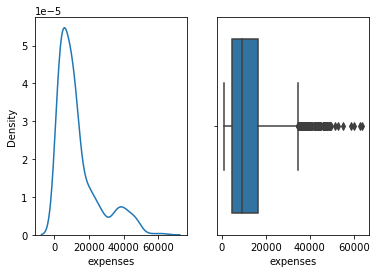

In [19]:
f, axes = plt.subplots(1,2)
sns.kdeplot(df['expenses'], ax=axes[0])
sns.boxplot(df['expenses'], ax=axes[1])
plt.show()

##### Both the boxplot and kernel density estimation plot reveal that the expenses data is right skewed. Furthermore, there are some outliers but no missning charges and smoker values.

In [20]:
insur_corr = df.corr()
insur_corr

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


In [22]:
insur_cov = df.cov()
insur_cov

,age,bmi,children,expenses
age,197.401387,9.368560,0.719303,5.087480e+04
bmi,9.368560,37.190265,0.092958,1.466515e+04
children,0.719303,0.092958,1.453213,9.926742e+02
expenses,50874.802133,14665.149703,992.674243,1.466524e+08


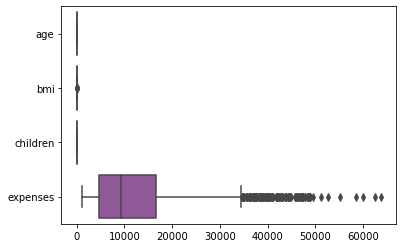

In [25]:
ax = sns.boxplot(data = df, orient = 'h', color = 'violet', palette = "Set1")
plt.show()

In [26]:
def outlier_detect(df):
    for i in df.describe().columns:
        Q1 = df.describe().at['25%', i]
        Q3 = df.describe().at['75%', i]
        
        IQR = Q3 - Q1
        LTV = Q1 - 1.5 * IQR
        UTV = Q3 + 1.5 * IQR
        x = np.array(df[i])
        p = []
        for j in x:
            if j < LTV or j >UTV:
                p.append(j)
        print('\n Outliers for Column:', i, 'Outliers Count', len(p))
        print(p)
        

In [27]:
x = df[num_cols]
outlier_detect(x)


 Outliers for Column: age Outliers Count 0
[]

 Outliers for Column: bmi Outliers Count 9
[49.1, 48.1, 47.5, 47.4, 50.4, 47.6, 52.6, 47.7, 53.1]

 Outliers for Column: children Outliers Count 0
[]

 Outliers for Column: expenses Outliers Count 139
[39611.76, 36837.47, 37701.88, 38711.0, 35585.58, 51194.56, 39774.28, 48173.36, 38709.18, 37742.58, 47496.49, 37165.16, 39836.52, 43578.94, 47291.06, 47055.53, 39556.49, 40720.55, 36950.26, 36149.48, 48824.45, 43753.34, 37133.9, 34779.62, 38511.63, 35160.13, 47305.31, 44260.75, 41097.16, 43921.18, 36219.41, 46151.12, 42856.84, 48549.18, 47896.79, 42112.24, 38746.36, 42124.52, 34838.87, 35491.64, 42760.5, 47928.03, 48517.56, 41919.1, 36085.22, 38126.25, 42303.69, 46889.26, 46599.11, 39125.33, 37079.37, 35147.53, 48885.14, 36197.7, 38245.59, 48675.52, 63770.43, 45863.21, 39983.43, 45702.02, 58571.07, 43943.88, 39241.44, 42969.85, 40182.25, 34617.84, 42983.46, 42560.43, 40003.33, 45710.21, 46200.99, 46130.53, 40103.89, 34806.47, 40273.65, 44400

In [28]:
df.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [29]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

##### Change the column 'Sex' to 'Gender':

In [30]:
df.rename(columns = {'sex': 'gender'}, inplace = True, level = None)

In [31]:
df.gender.value_counts()

male      676
female    662
Name: gender, dtype: int64

##### Duplicate Data:

In [32]:
df.duplicated().sum(0)

1

##### Removing Duplicated :

In [33]:
df = df.drop_duplicates()

In [34]:
df.duplicated().sum()

0

##### Plot the Insurance Premium Dataset : 

<AxesSubplot:ylabel='Frequency'>

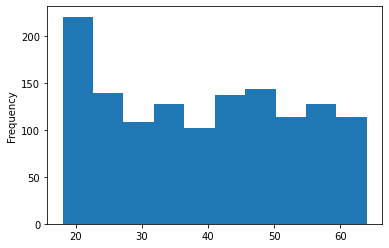

In [35]:
df.age.plot(kind = 'hist')

In [36]:
df.smoker.count()

1337

Text(0, 0.5, 'count')

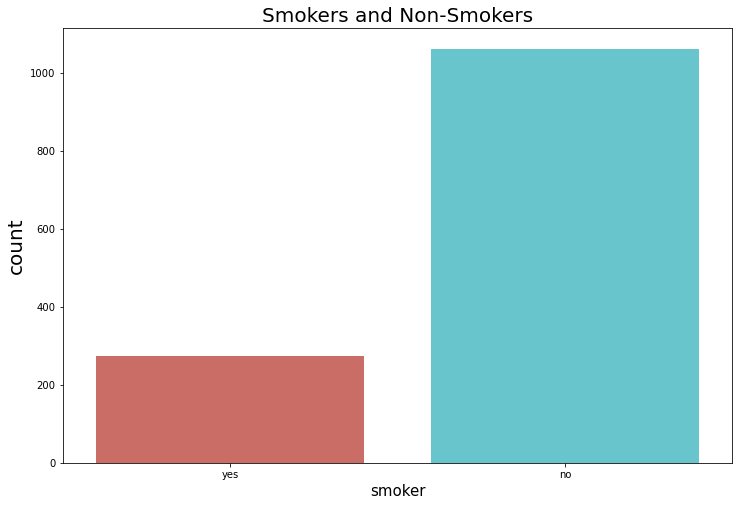

In [37]:
plt.figure(figsize = (12,8))
g = sns.countplot(x = 'smoker', data = df, palette = 'hls')
g.set_title("Smokers and Non-Smokers", fontsize = 20)
g.set_xlabel("smoker", fontsize = 15)
g.set_ylabel("count", fontsize = 20)

Text(0, 0.5, 'count')

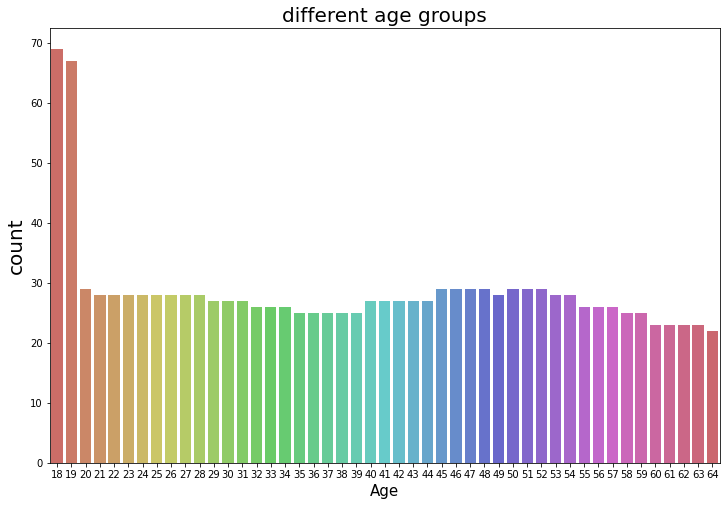

In [38]:
plt.figure(figsize = (12,8))
g = sns.countplot(x = 'age', data = df, palette = 'hls')
g.set_title("different age groups", fontsize = 20)
g.set_xlabel("Age", fontsize = 15)
g.set_ylabel("count", fontsize = 20)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

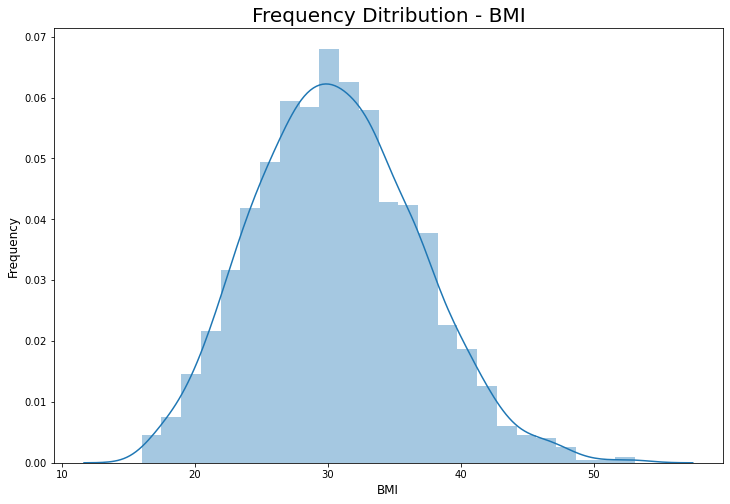

In [39]:
plt.figure(figsize = (12,8))
g = sns.distplot(df['bmi'])
g.set_title("Frequency Ditribution - BMI", fontsize = 20)
g.set_xlabel("BMI", fontsize = 12)
g.set_ylabel("Frequency", fontsize = 12)

##### Observation : The shape of the expenses Data is Right Skewed Distribution.

#### Box Plot Using seaborn: 

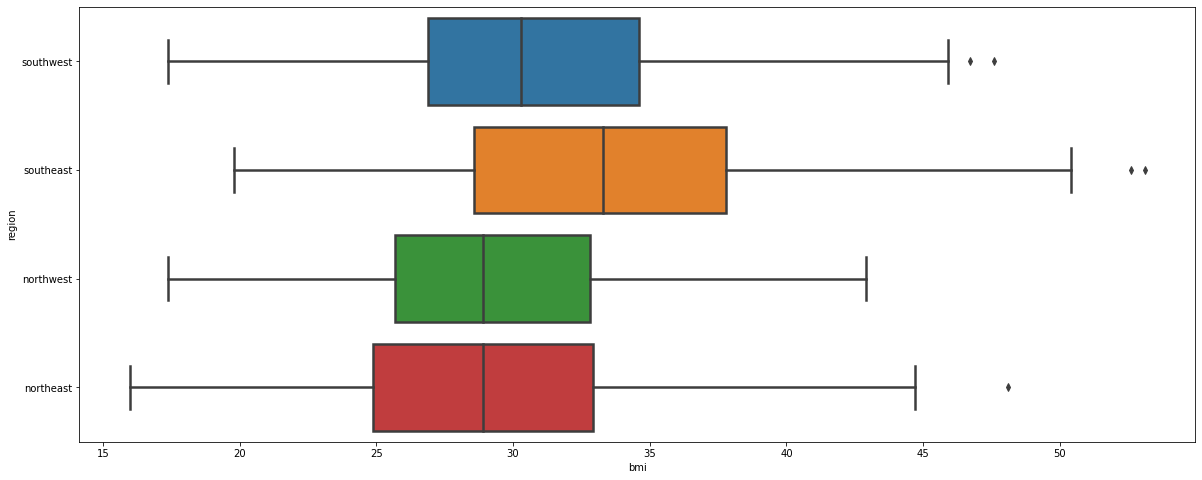

In [40]:
plt.figure(figsize = (20, 8))
ax = sns.boxplot(x = 'bmi', y = 'region', data = df, linewidth = 2.5)
plt.show()

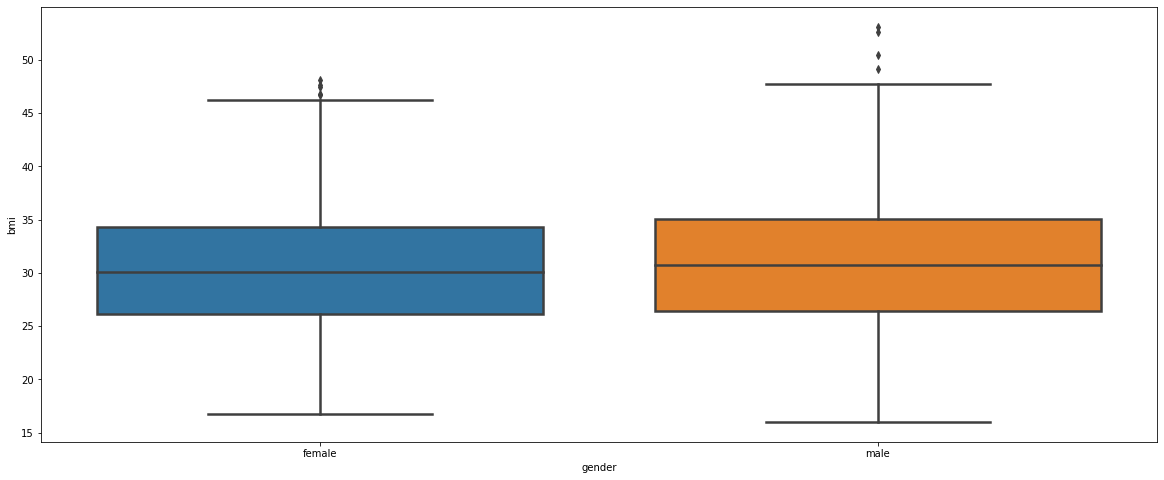

In [41]:
plt.figure(figsize = (20, 8))
ax = sns.boxplot(x = 'gender', y = 'bmi', data = df, linewidth = 2.5)
plt.show()

<AxesSubplot:ylabel='Frequency'>

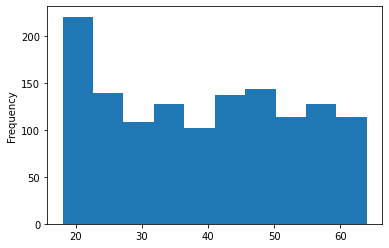

In [42]:
df.age.plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

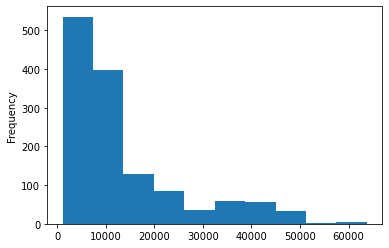

In [43]:
df.expenses.plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

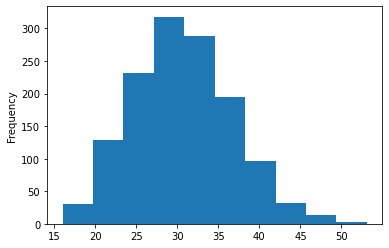

In [44]:
df.bmi.plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

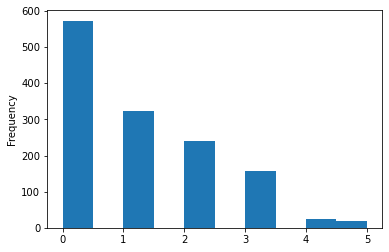

In [45]:
df.children.plot(kind = 'hist')

<AxesSubplot:ylabel='region'>

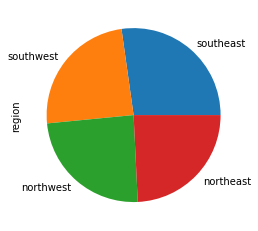

In [46]:
df.region.value_counts().plot(kind = 'pie')

<AxesSubplot:ylabel='smoker'>

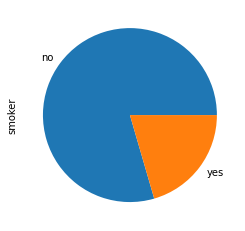

In [47]:
df.smoker.value_counts().plot(kind = 'pie')

In [48]:
df.groupby("smoker").expenses.agg(['mean', 'median', 'count'])

,mean,median,count
smoker,,,
no,8440.660461,7345.73,1063
yes,32050.231971,34456.35,274


##### Mean expenses for smokers is more than Non-smokers......

##### Observation: The mean, median and count differences between Smokers and Non Smokers is very large...

#### Expenses for male and female:

In [49]:
df.groupby('gender').expenses.agg(['mean', 'median', 'count'])

,mean,median,count
gender,,,
female,12569.578897,9412.965,662
male,13974.999111,9377.900,675


#### Mean of Smokers and Non Smokers:

In [50]:
df.groupby('smoker').age.mean()

smoker
no     39.404516
yes    38.514599
Name: age, dtype: float64

#### Correlation HeatMap:

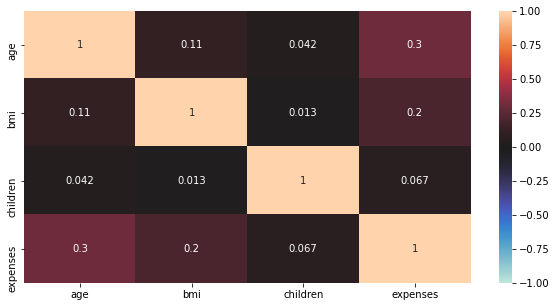

In [52]:
plt.figure(figsize = (10,5))

corr = df.corr()
ax = sns.heatmap(corr, vmin= -1, vmax= 1, center = 0, annot = True)

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

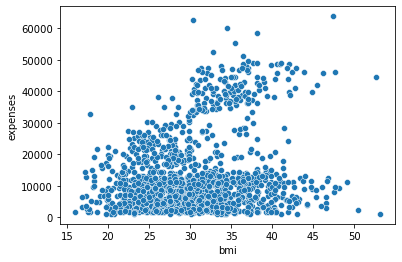

In [53]:
sns.scatterplot(x = df['bmi'], y = df['expenses'])

##### The above plot suggest that body mass index (BMI) and expenses are positively correlated, where customers with higher BMI typically also tend to pay more in insurance premium (This pattern make sense since high BMI is typically associated with higher risk of chronic didease)

##### To double-check the strength of this relationsip, you might like to add a regression line, or the line thta best fits the data. we do this by changing the command to sns.regplot.

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

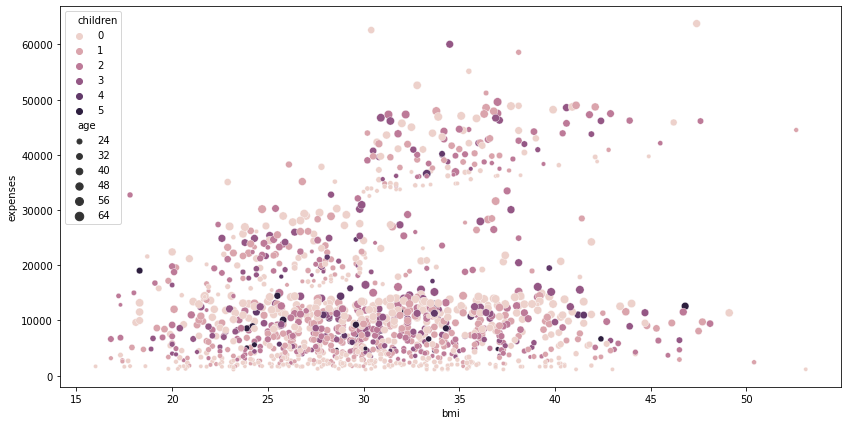

In [54]:
plt.figure(figsize = (14, 7))
sns.scatterplot(x = df['bmi'], y = df['expenses'], hue = df['children'], size = df['age'])

<AxesSubplot:xlabel='age', ylabel='expenses'>

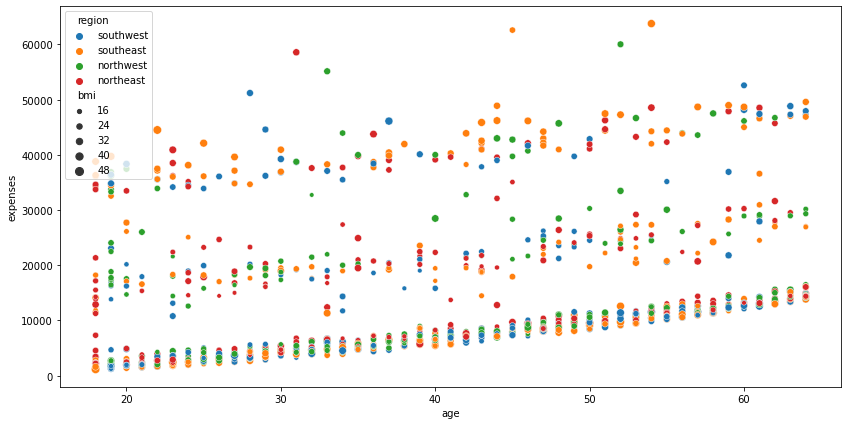

In [55]:
plt.figure(figsize = (14, 7))
sns.scatterplot(x = df['age'], y = df['expenses'], hue = df['region'], size = df['bmi'])

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

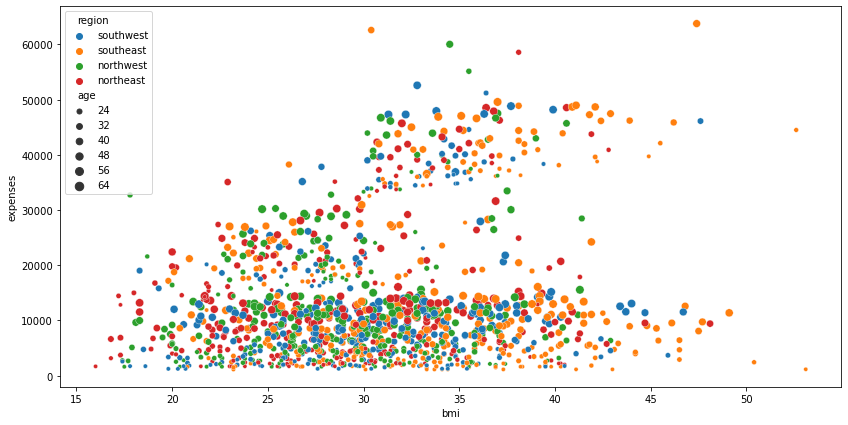

In [56]:
plt.figure(figsize = (14, 7))
sns.scatterplot(x = df['bmi'], y = df['expenses'], hue = df['region'], size = df['age'])

<AxesSubplot:xlabel='age', ylabel='expenses'>

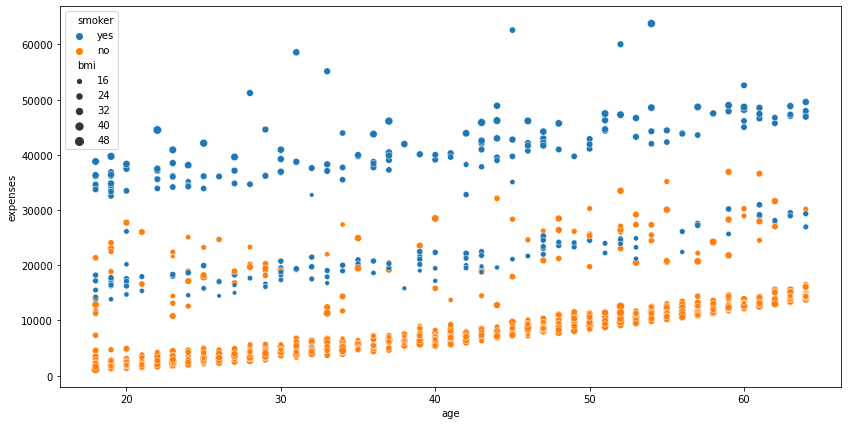

In [57]:
plt.figure(figsize = (14, 7))
sns.scatterplot(x = df['age'], y = df['expenses'], hue = df['smoker'], size = df['bmi'])

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

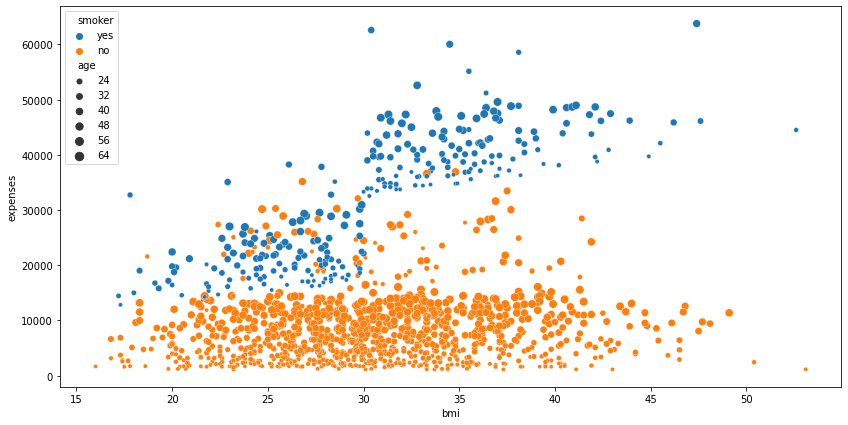

In [58]:
plt.figure(figsize = (14, 7))
sns.scatterplot(x = df['bmi'], y = df['expenses'], hue = df['smoker'], size = df['age'])

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

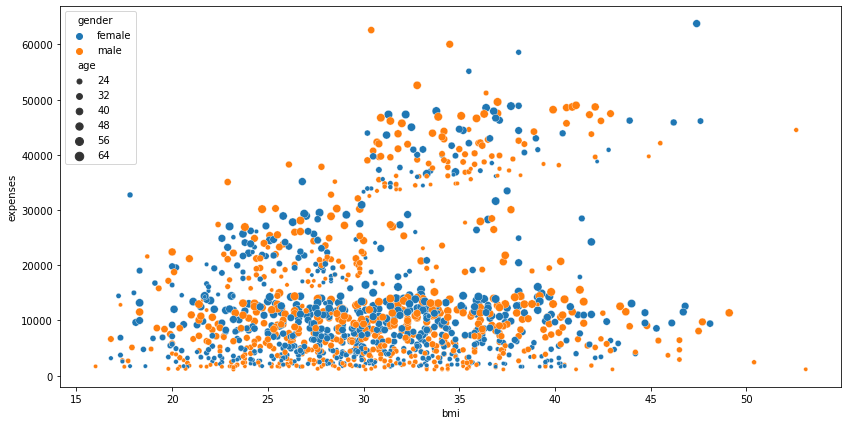

In [59]:
plt.figure(figsize = (14, 7))
sns.scatterplot(x = df['bmi'], y = df['expenses'], hue = df['gender'], size = df['age'])

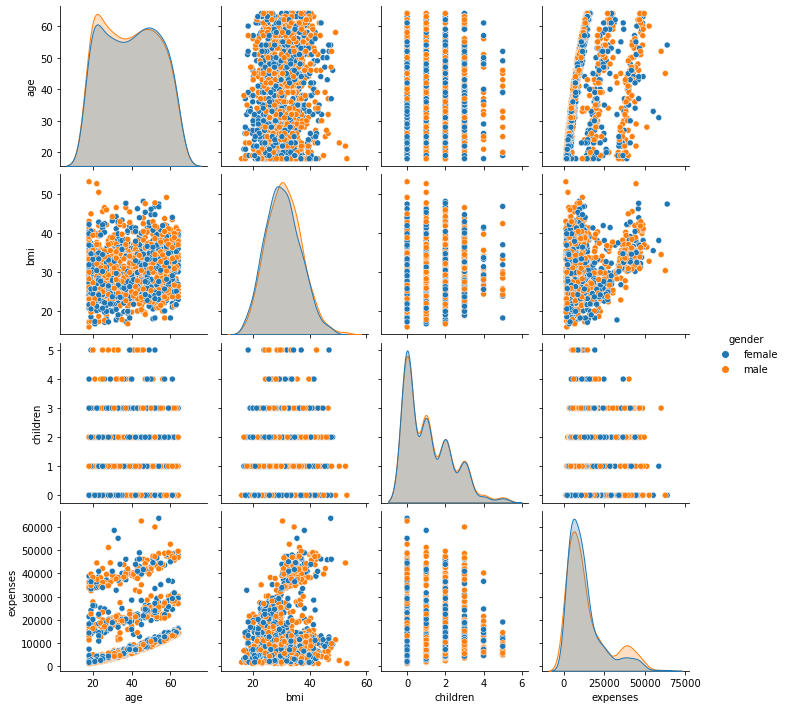

In [60]:
sns.pairplot(data=df, hue = 'gender')

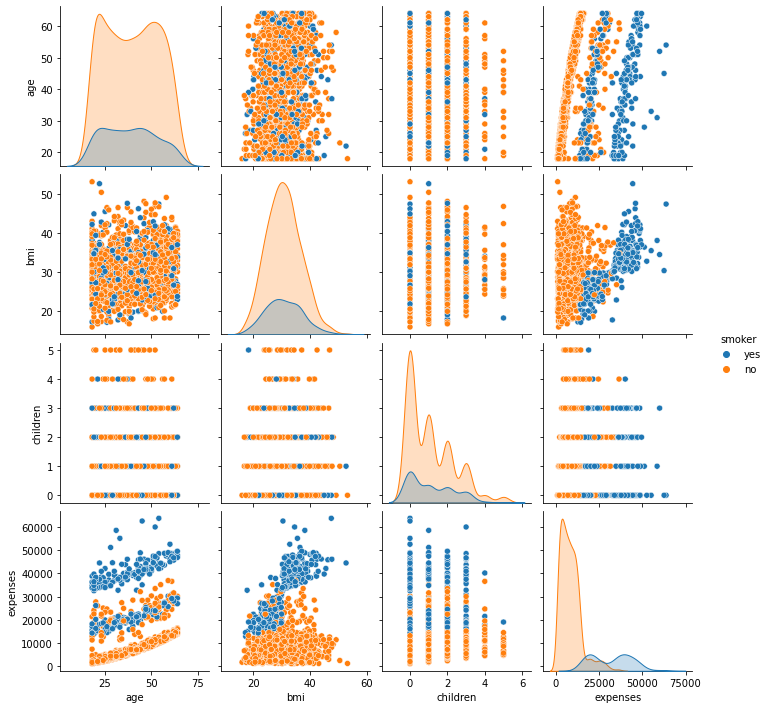

In [61]:
sns.pairplot(data=df, hue = 'smoker')

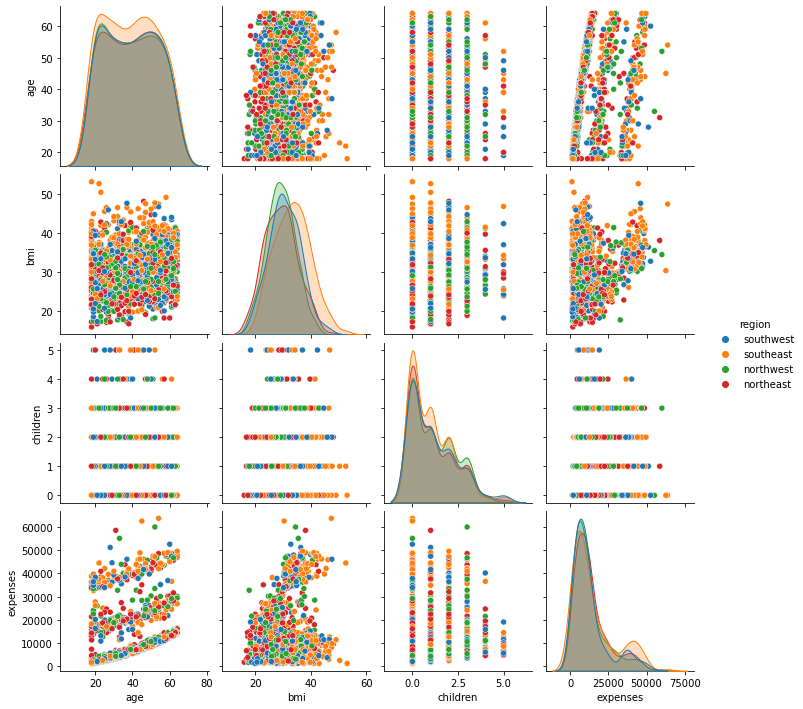

In [62]:
sns.pairplot(data=df, hue = 'region')

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

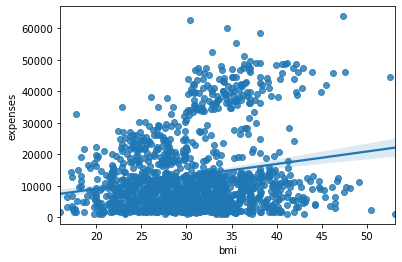

In [64]:
sns.regplot(x=df['bmi'], y = df['expenses'])

##### Color-coded scatter plots : We can use scatter plots to display the relationships between not two, but even three variables. One way of doing this is by color-coding the points.


##### For instance, to understand how smoking affects the relationship between BMI and insurance expenses, we can color code the points by smoker and plot the other two columns ('bmi', 'expenses') on the axes.

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

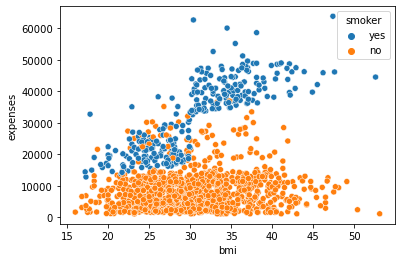

In [65]:
sns.scatterplot(x=df['bmi'], y=df['expenses'], hue = df['smoker'])

##### This scatter plot shows that nonsmokers tend to pay slightly more with increasing BMI, smokers pay much more.

##### To further emphasize, Use the sns.lmplot command to add two regression lines, corresponding to smokers and nonsmokers.

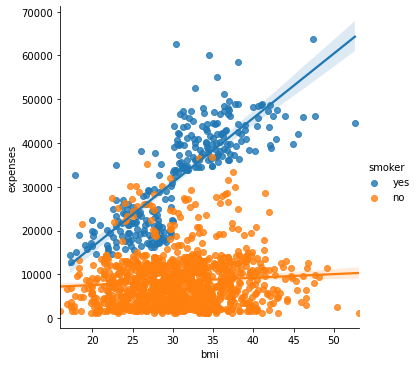

In [66]:
sns.lmplot(x='bmi', y='expenses', hue = 'smoker', data = df)

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='smoker', ylabel='expenses'>

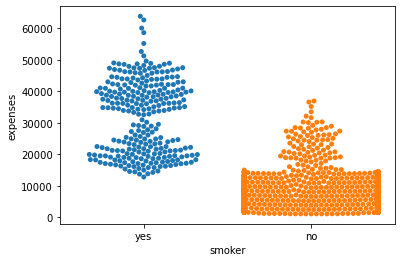

In [67]:
sns.swarmplot(x=df['smoker'], y=df['expenses'])

##### The swarm plot shows us that: on average, non smokers are charged less than smokers and the customers who pay the most are smokers, whereas the customers who pay the least are non smokers.

#### Finding the Overall Distribution of Insurance Premium Data:

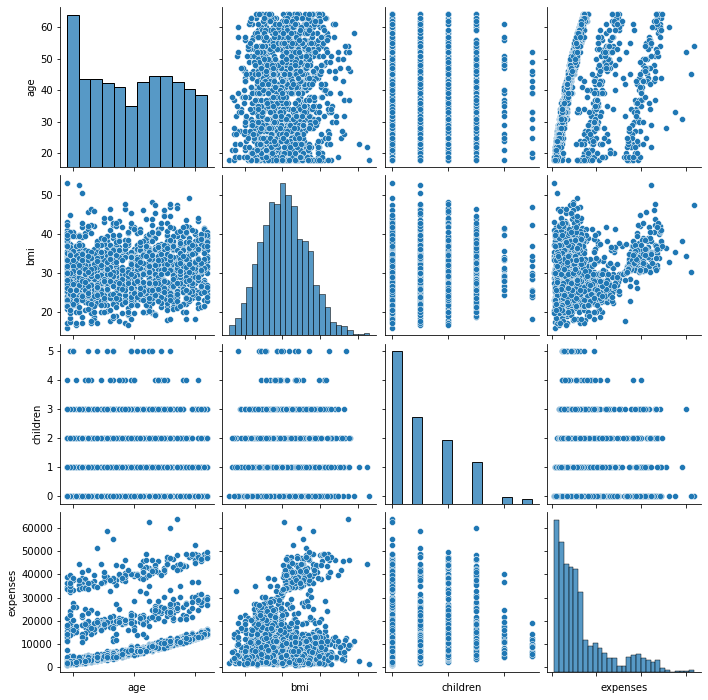

In [68]:
import seaborn as sns
g = sns.pairplot(df)
g.set(xticklabels = [])

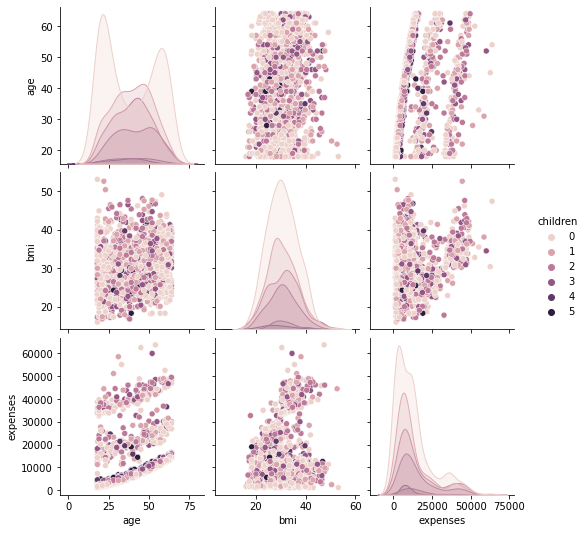

In [69]:
sns.pairplot(data=df, hue = 'children')

In [70]:
# Importing necessary package for creating model 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [71]:
cat_col = ['smoker', 'region', 'gender']
num_col = [i for i in df.columns if i not in cat_col]
num_col

['age', 'bmi', 'children', 'expenses']

In [74]:
# One-hot encoding 
one_hot = pd.get_dummies(df[cat_col])
insur_procsd_df = pd.concat([df[num_col], one_hot], axis = 1)
insur_procsd_df.head(10)

,age,bmi,children,expenses,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,gender_female,gender_male
0,19,27.9,0,16884.92,0,1,0,0,0,1,1,0
1,18,33.8,1,1725.55,1,0,0,0,1,0,0,1
2,28,33.0,3,4449.46,1,0,0,0,1,0,0,1
3,33,22.7,0,21984.47,1,0,0,1,0,0,0,1
4,32,28.9,0,3866.86,1,0,0,1,0,0,0,1
5,31,25.7,0,3756.62,1,0,0,0,1,0,1,0
6,46,33.4,1,8240.59,1,0,0,0,1,0,1,0
7,37,27.7,3,7281.51,1,0,0,1,0,0,1,0
8,37,29.8,2,6406.41,1,0,1,0,0,0,0,1
9,60,25.8,0,28923.14,1,0,0,1,0,0,1,0


In [76]:
# Label encoding 
insr_procsd_df_label = df
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in cat_col:
    insr_procsd_df_label[i] = label_encoder.fit_transform(insr_procsd_df_label[i])
insr_procsd_df_label.head(10)

<ipython-input-76-4910b4bce1f7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insr_procsd_df_label[i] = label_encoder.fit_transform(insr_procsd_df_label[i])


,age,gender,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
5,31,0,25.7,0,0,2,3756.62
6,46,0,33.4,1,0,2,8240.59
7,37,0,27.7,3,0,1,7281.51
8,37,1,29.8,2,0,0,6406.41
9,60,0,25.8,0,0,1,28923.14


In [77]:
#Using one hot encoding 
X = insur_procsd_df.drop(columns='expenses')
y = df[['expenses']]

In [78]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = 0.3, random_state = 1234)

In [79]:
model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression()

In [81]:
# Print Model intercept and co-efficent
print("Model intercept", model.intercept_, "Model co-efficient", model.coef_)

Model intercept [-2.02804338] Model co-efficient [[   254.80507771    331.52281729    509.77181528 -12293.49435187
   12293.49435187    689.79246289     43.0935488    -452.55130361
    -280.33470808    408.31872058   -408.31872058]]


In [83]:
cdf = pd.DataFrame(data = model.coef_.T, index = X.columns, columns = ['Coefficients'])
cdf

,Coefficients
age,254.805078
bmi,331.522817
children,509.771815
smoker_no,-12293.494352
smoker_yes,12293.494352
region_northeast,689.792463
region_northwest,43.093549
region_southeast,-452.551304
region_southwest,-280.334708
gender_female,408.318721


In [90]:
# Print various metrics 

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Predicting the train data')
train_predict = model.predict(train_X)
print("Predicting the test data")
test_predict= model.predict(test_X)
print("MAE")
print("Train :", mean_absolute_error(train_y, train_predict))
print("Test :", mean_absolute_error(test_y, test_predict))
print("==================================================")
print("MSE")
print("Train :", mean_squared_error(train_y, train_predict))
print("Test :", mean_squared_error(test_y, test_predict))
print("===================================================")
print("RMSE")
print("Train :", np.sqrt(mean_squared_error(train_y, train_predict)))
print("Test :", np.sqrt(mean_squared_error(test_y, test_predict)))
print("============================================================")
print("R^2")
print("Train :", r2_score(train_y, train_predict))
print("Test :", r2_score(test_y, test_predict))
print("MAPE")
print("Train :", np.mean(np.abs((train_y - train_predict)/train_y))*100)
print("Test :", np.mean(np.abs((test_y - test_predict)/test_y))*100)


Predicting the train data
Predicting the test data
MAE
Train : 4134.560205071933
Test : 4230.685888666399
MSE
Train : 37064299.82573062
Test : 36067136.80464377
RMSE
Train : 6088.045649116852
Test : 6005.592127729269
R^2
Train : 0.7508771595922442
Test : 0.7448469285923195
MAPE
Train : expenses    41.681263
dtype: float64
Test : expenses    42.445238
dtype: float64


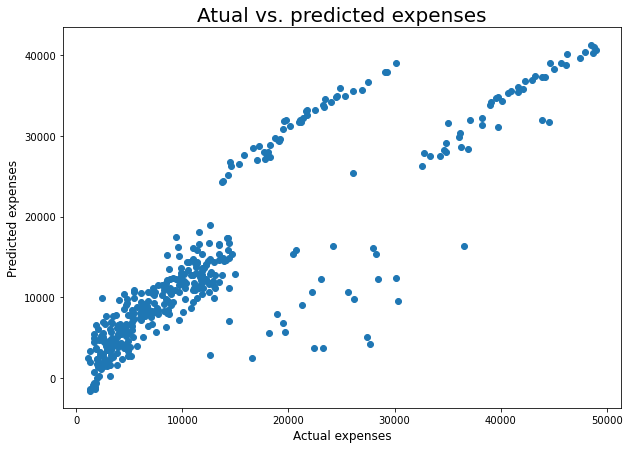

In [89]:
#plot actual vs predicted value 
plt.figure(figsize = (10, 7))
plt.title("Atual vs. predicted expenses", fontsize = 20)
plt.xlabel("Actual expenses", fontsize = 12)
plt.ylabel("Predicted expenses", fontsize = 12)
plt.scatter(x = test_y, y=test_predict)